<a href="https://colab.research.google.com/github/ThivaV/ML-Course-Works/blob/main/02_TensorFlow_Classification/02_TensorFlow_NeuralNetwork_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook We're going to learn how to write neural networks for classification problems.

A classification is where We try to classify something as one thing or another.

A few types of classification problems:
  * **Binary Classification**
  * **Multiclass Classification**
  * **Multilabel Classification**

> The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# We making example classification data with sklearn

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(
  n_samples,
  noise=0.03,
  random_state=42
)

In [2]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to understand so let's visualize it

In [6]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


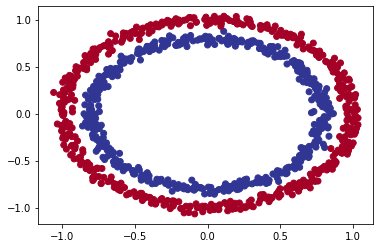

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

🛠️ **Exercise:** Before pushing forward, spend time playing around with [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.42312&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) building and running different neural network. See what happens when you change different hyperparameters.

## Input and Output shapes

In [9]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# How many samples We're working with
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

**How to evaluate a classification model ?**

	* https://www.ritchieng.com/machine-learning-evaluate-classification-model/
	* https://towardsdatascience.com/how-to-best-evaluate-a-classification-model-2edb12bcc587

  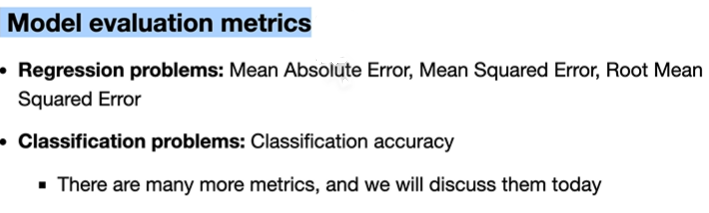

In [12]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
  loss=tf.keras.losses.BinaryCrossentropy(),
  optimizer=tf.keras.optimizers.SGD(),
  metrics=["accuracy"]
)

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [15]:
# Let's try improve our model by training it for longer since the accuracy is lower above
model_1.fit(X, y, epochs=200, verbose=0)

# Note: This is wrong, We evaluating on the same data We use to "TRAIN".
# We should have spilt the data to Train and Test. And use the Test data to evaluate
# Or spilt the data in to Train, Evaluate & Test, then should've used the Evaluation data here  
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since We're working on a bonary classification problem and our model is getting around ~50% accuray.. It's performing as if it's guessing.
So, let's step things up a notch and add an extra layer.

In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
  loss=tf.keras.losses.BinaryCrossentropy(),
  optimizer=tf.keras.optimizers.SGD(),
  metrics=["accuracy"]
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [18]:
# 4. Evaluate the model

# Note: This is wrong, We evaluating on the same data We use to "TRAIN".
# We should have spilt the data to Train and Test. And use the Test data to evaluate
# Or spilt the data in to Train, Evaluate & Test, then should've used the Evaluation data here 
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Improving the model

Trying to improving the model futher since `model_2` also not performed well.

1. Create a model - We might add more layers or increase the number of hidden units within a layer.
2. Compiling a model - Here we might want to choose a different optimization function such as **Adam** instead of **SGD**. 
3. Fitting a model - Perhaps We might fit our model for more epochs (leave it for training for longer).

In [19]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model (this time with 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # added 100 neurons
  tf.keras.layers.Dense(10),  # added anpother layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
  loss=tf.keras.losses.BinaryCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [20]:
# 4. Evaluate the model

# Note: This is wrong, We evaluating on the same data We use to "TRAIN".
# We should have spilt the data to Train and Test. And use the Test data to evaluate
# Or spilt the data in to Train, Evaluate & Test, then should've used the Evaluation data here 
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

To visulaize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and lables (y)
* Create a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [21]:
import numpy as np

In [22]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (We're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make prediction
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshpae our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshpae(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


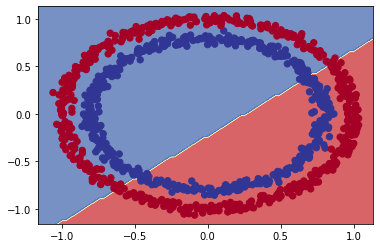

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X=X, y=y)

🔑 **Note:** 
1. [cs231n Neural Networks Case Study](https://cs231n.github.io/neural-networks-case-study/) study this to create graphs like above **(And its a good course to follow)**

2. [Made with ML Git repository](https://github.com/GokuMohandas/MadeWithML) 

[Specifically referred notebook](https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb)